=== Confusion Matrix ===
[[513  79   0  32   0]
 [ 63 103   0   0   0]
 [  1   0   1   8   0]
 [ 79   1   1 115   0]
 [  0   4   0   0   0]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       624
           1       0.55      0.62      0.58       166
           2       0.50      0.10      0.17        10
           3       0.74      0.59      0.66       196
           4       0.00      0.00      0.00         4

    accuracy                           0.73      1000
   macro avg       0.51      0.43      0.44      1000
weighted avg       0.73      0.73      0.73      1000


=== Accuracy Score ===
0.7320


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


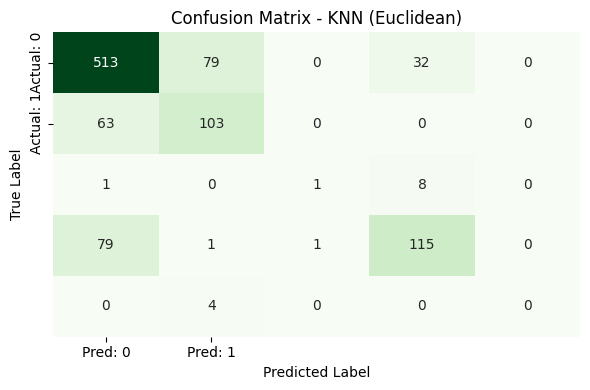

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('schizo_symptons_cleaned_L2.xlsx')
df.columns = df.columns.str.strip()

# Pisahkan fitur dan label
X = df.drop(columns=['Schizophrenia'])
y = df['Schizophrenia']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model KNN Euclidean
knn_l2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_l2.fit(X_train, y_train)
y_pred = knn_l2.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Accuracy Score ===\n{accuracy:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Pred: 0', 'Pred: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix - KNN (Euclidean)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()